In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time 

In [2]:
data = pd.read_csv('train.csv')
data_t = pd.read_csv('test.csv')

In [13]:
train_labels = data.iloc[:,0]
train = data.iloc[:,1:785]
test= data_t
train_data = []
test_data = []
for i in range (len(train)):
    t = train.iloc[i].values.reshape((28,28))
    train_data.append(t)
for i in range (len(test)):
    r = test.iloc[i].values.reshape((28,28))
    test_data.append(r)

t1 = test_data[0:20]


In [4]:
train_number, train_count = np.unique(train_labels, return_counts= True)
print(dict(zip(train_number, train_count)))

{0: 4132, 1: 4684, 2: 4177, 3: 4351, 4: 4072, 5: 3795, 6: 4137, 7: 4401, 8: 4063, 9: 4188}


In [4]:
def vis_image(x):
    plt.axis('off') #takes off the axis
    plt.imshow(x,cmap=plt.cm.gray)
    plt.show()
    return

def show_image(index, dataset = ""):
    if (dataset == "train"):
        vis_image(train_data[index])
        label = train_labels[index]
        print("Training label",label)
    else:
        vis_image(test_data[index])
        
        print("Testing image")
    return 




In [5]:
def e_distance(x,y):
    return np.sum(np.square(x-y))

def L1(x,y):
    return np.sum(x-y)

def L_inf(x,y):
    return np.max(x-y)

print('Euclidean distance between:', e_distance(train_data[1],train_data[2]))

#print('L1:', L1(train_data[1],train_data[2]))

#print('L infinity:', L_inf(train_data[1],train_data[2]))

Euclidean distance between: 10397736


NN Comparison
NN clasifier:  2


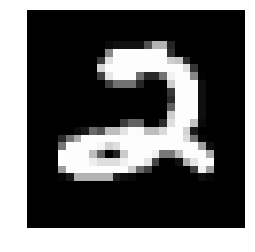

Testing image
Test image None


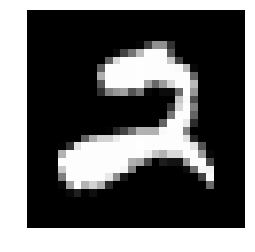

Training label 2
Nearest neighbour image None


In [16]:
def NN(x):
    distances = []
    for i in range (len(train_data)):
        temp = e_distance(x, train_data[i])
        distances.append(temp)   
    return np.argmin(distances)
def NN_classifier(x):
    index = NN(x)
    return train_labels[index]
def run_nn(x):
    print('NN Comparison')
    print('NN clasifier: ',NN_classifier(test_data[x]))
    print('Test image', show_image(x,"test"))
    print('Nearest neighbour image',show_image(NN(test_data[x]),"train"))
    return
run_nn(0)

In [14]:
before = time.time()
test_predictions = []
for i in range(len(t1)):
    temp = NN_classifier(t1[i])
    test_predictions.append(temp)
after = time.time()

print(test_predictions)
print(after - before)

[2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]
15.67418384552002
